# Lab 1. PyTorch and ANNs

**Deadline**: September 22, 11:59pm.

**Late Penalty**: There is a penalty-free grace period of one hour past the deadline. Any work that is submitted between 1 hour and 24 hours past the deadline will receive a 20% grade deduction. No other late work is accepted. Quercus submission time will be used, not your local computer time. You can submit your labs as many times as you want before the deadline, so please submit often and early.

**TAs**: Andrew Jung

This lab is partially based on an assignment developed by Prof. Jonathan Rose and Harris Chan.

This lab is a warm up to get you used to the PyTorch programming environment used
in the course, and also to help you review and renew your knowledge
of Python and relevant Python libraries.
The lab must be done individually. Please recall that the
University of Toronto plagarism rules apply.

By the end of this lab, you should be able to:

1. Be able to perform basic PyTorch tensor operations.
2. Be able to load data into PyTorch
3. Be able to configure an Artificial Neural Network (ANN) using PyTorch
4. Be able to train ANNs using PyTorch
5. Be able to evaluate different ANN configuations

You will need to use numpy and PyTorch documentations for this assignment:

* https://docs.scipy.org/doc/numpy/reference/
* https://pytorch.org/docs/stable/torch.html

You can also reference Python API documentations freely.


### What to submit

Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to **File > Print** and then save as PDF. The Colab instructions
has more information.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

With Colab, you can export a PDF file using the menu option
`File -> Print` and save as PDF file.

## Colab Link

Submit make sure to include a link to your colab file here

Colab Link: 

## Part 1. Python Basics [9 pt]

The purpose of this section is to get you used to the 
basics of Python, including working with functions, numbers,
lists, and strings.

Note that we **will** be checking your code for clarity and efficiency.

If you have trouble with this part of the assignment, please review http://cs231n.github.io/python-numpy-tutorial/

### Part (a) -- 3pt

Write a function `sum_of_cubes` that computes the sum of cubes up to `n`. If the input to `sum_of_cubes` invalid (e.g. negative or non-integer `n`), the function should print out `"Invalid input"` and return `-1`.

In [52]:
def sum_of_cubes(n):
    """Return the sum (1^3 + 2^3 + 3^3 + ... + n^3)
    
    Precondition: n > 0, type(n) == int
    
    >>> sum_of_cubes(3)
    36
    >>> sum_of_cubes(1)
    1
    """
    if n<=0 or n%1 != 0:
        return -1
    else:
        sum = 0
        for i in range(1,n+1):
            sum+=i**3
        return sum

### Part (b) -- 3pt

Write a function `word_lengths` that takes a sentence (string), computes the length of each word in that sentence, and returns the length of each word in a list. You can
assume that words are always separated by a space character `" "`.

Hint: recall the `str.split` function in Python.
If you arenot sure how this function works, try
typing `help(str.split)` into a Python shell, or check out https://docs.python.org/3.6/library/stdtypes.html#str.split

In [53]:
help(str.split)

Help on method_descriptor:

split(...)
    S.split(sep=None, maxsplit=-1) -> list of strings
    
    Return a list of the words in S, using sep as the
    delimiter string.  If maxsplit is given, at most maxsplit
    splits are done. If sep is not specified or is None, any
    whitespace string is a separator and empty strings are
    removed from the result.



In [54]:
def word_lengths(sentence):
    """Return a list containing the length of each word in
    sentence.
    
    >>> word_lengths("welcome to APS360!")
    [7, 2, 7]
    >>> word_lengths("machine learning is so cool")
    [7, 8, 2, 2, 4]
    """
    words = sentence.split(' ')
    lengths = []
    for word in words:
        lengths.append(len(word))
    return lengths

### Part (c) -- 3pt

Write a function `all_same_length` that takes a sentence (string),
and checks whether every word in the string is the same length.
You should call the function `word_lengths` in the body
of this new function.


In [55]:
def all_same_length(sentence):
    """Return True if every word in sentence has the same
    length, and False otherwise.
    
    >>> all_same_length("all same length")
    False
    >>> word_lengths("hello world")
    True
    """
    lengths = word_lengths(sentence)
    standard = lengths[0]
    for i in lengths:
        if i != standard:
            return False
    return True

## Part 2. NumPy Exercises [11 pt]

In this part of the assignment, you'll be manipulating arrays 
usign NumPy. Normally, we use the shorter name `np` to represent
the package `numpy`.

In [56]:
import numpy as np

### Part (a) -- 2pt

The below variables `matrix` and `vector` are numpy arrays. Explain what you think `<NumpyArray>.size` and `<NumpyArray>.shape` represent.

In [57]:
matrix = np.array([[1., 2., 3., 0.5],
                   [4., 5., 0., 0.],
                   [-1., -2., 1., 1.]])
vector = np.array([2., 0., 1., -2.])

In [58]:
matrix.size # matrix.size - calculates the number of entries in the matrix

12

In [59]:
matrix.shape # matrix.shape - returns the dimensions of the matrix

(3, 4)

In [60]:
vector.size # vector.size - returns the number of entries in the vector

4

In [61]:
vector.shape # vector.shape - returns the dimensions of the array

(4,)

### Part (c) -- 3pt

Perform matrix multiplication `output = matrix x vector` by using
for loops to iterate through the columns and rows.
Do not use any builtin NumPy functions.
Cast your output into a NumPy array, if it isn't one already.

Hint: be mindful of the dimension of output

In [62]:
output = None
dotprod = 0
output = np.array([])
for row in matrix:
    for item_index in range(len(row)):
        dotprod += row[item_index]*vector[item_index]
    output = np.append(output, [dotprod])
    dotprod = 0

In [63]:
output

array([ 4.,  8., -3.])

### Part (d) -- 1pt

Perform matrix multiplication `output2 = matrix x vector` by using
the function `numpy.dot`.

We will never actually write code as in
part(c), not only because `numpy.dot` is more concise and easier to read/write, but also performance-wise `numpy.dot` is much faster (it is written in C and highly optimized).
In general, we will avoid for loops in our code.

In [64]:
output2 = None
output2 = np.dot(matrix, vector)

In [65]:
output2

array([ 4.,  8., -3.])

### Part (e) -- 2pt

As a way to test for consistency, show that the two outputs match.

In [66]:
print(np.array_equal(output,output2))

True


### Part (f) -- 3pt

Show that using `np.dot` is faster than using your code from part (c).

You may find the below code snippit helpful:

In [67]:
import time
# record the time before running code
start_time = time.time()
# place code to run here
for i in range(1000):
    dotprod = 0
    output = np.array([])
    for row in matrix:
        for item_index in range(len(row)):
            dotprod += row[item_index]*vector[item_index]
        output = np.append(output, [dotprod])
        dotprod = 0
# record the time after the code is run
end_time = time.time()
# compute the difference
diff1 = end_time - start_time
diff1

# record the time before running code
start_time = time.time()
# place code to run here
for i in range(1000):
    output2 = np.dot(matrix, vector)
# record the time after the code is run
end_time = time.time()
# compute the difference
diff2 = end_time - start_time

# compare first and second run times
diff2-diff1



-0.1352241039276123

A negative result means that diff2<diff1. In other words the manual dot product takes more time.

## Part 3. Images [7 pt]

A picture or image can be represented as a NumPy array of “pixels”, 
with dimensions H × W × C, where H is the height of the image, W is the width of the image,
and C is the number of colour channels. Typically we will use an image with channels that give the the Red, Green, and Blue “level” of each pixel, which is referred to with the short form RGB.

You will write Python code to load an image, and perform several array manipulations to the image and visualize their effects. 

In [68]:
import matplotlib.pyplot as plt

### Part (a) -- 1 pt

This is a photograph of a dog whose name is Mochi.

![alt text](https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews)

Load the image from its url (https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews) into the variable `img` using the `plt.imread` function.

Hint: You can enter the URL directly into the `plt.imread` function as a Python string.

In [69]:
img = None
img = plt.imread('C:\\Users\\jimmy\\PycharmProjects\\APSLab1\\dog_mochi.png')

### Part (b) -- 1pt

Use the function `plt.imshow` to visualize `img`. 

This function will also show the coordinate system used to identify pixels.
The origin is at the top left corner, and the first dimension indicates the Y (row) direction, 
and the second dimension indicates the X (column) dimension.

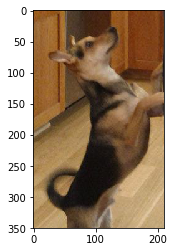

In [70]:
plt.imshow(img)

### Part (c) -- 2pt

Modify the image by adding a constant value of 0.25 to each pixel in the `img` and
store the result in the variable `img_add`. Note that, since the range for the pixels 
needs to be between [0, 1], you will also need to clip img_add to be in the range [0, 1] 
using `numpy.clip`. Clipping sets any value that is outside of the desired range to the 
closest endpoint. Display the image using `plt.imshow`.

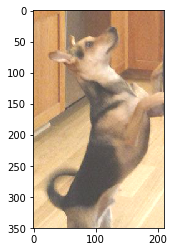

In [71]:
img_add = None
img_add = np.clip(img+0.25,0,1)
plt.imshow(img_add)

### Part (d) -- 3pt

Crop the **original** image (`img` variable) to a 130 x 150 image including Mochi's face. Discard the alpha colour channel (i.e. resulting `img_cropped` should **only have RGB channels**)

Display the image.

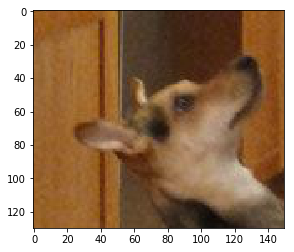

In [72]:
img_cropped = img[0:130,0:150,:3]
plt.imshow(img_cropped)

## Part 4. Basics of PyTorch [12 pt]

PyTorch is a Python-based neural networks package. Along with tensorflow, PyTorch is currently one of the most popular machine learning libraries.

PyTorch, at its core, is similar to Numpy in a sense that they both 
try to make it easier to write codes for scientific computing
achieve improved performance over vanilla Python by leveraging highly optimized C back-end.
However, compare to Numpy, PyTorch offers much better GPU support and provides many high-level features for machine learning. Technically, Numpy can be used to perform almost every thing PyTorch does. However, Numpy would be a lot slower than PyTorch, especially with CUDA GPU, and it would take more effort to write machine learning related code compared to using PyTorch.

In [73]:
import torch

### Part (a) -- 1 pt

Use the function `torch.from_numpy` to convert the numpy array `img_cropped` into
a PyTorch tensor. Save the result in a variable called `img_torch`.

In [74]:
img_torch = None
img_torch = torch.from_numpy(img_cropped)

### Part (b) -- 1pt

Use the method `<Tensor>.shape` to find the shape (dimension and size) of `img_torch`.

In [75]:
img_torch.shape

torch.Size([130, 150, 3])

### Part (c) -- 1pt

How many floating-point numbers are stored in the tensor `img_torch`?

The number of floating point numbres = 130*150*3 = 58500 floating point numbers stored

### Part (d) -- 3 pt

What does the code `img_torch.transpose(0,2)` do? What does the expression return? 
Is the original variable `img_torch` updated? Explain.

It transposes dimensions 0 and 2 in the tensor. it returns another tensor without updating the original tensor.

### Part (e) -- 3 pt

What does the code `img_torch.unsqueeze(0)` do? What does the expression return? 
Is the original variable `img_torch` updated? Explain.

It adds another dimension to img_torch tensor, giving position 0 to the current tensor. does not update img_torch

### Part (f) -- 3 pt

Find the maximum value of `img_torch` along each colour channel? Your output should be a one-dimensional
PyTorch tensor with exactly three values.

Hint: lookup the function `torch.max`.

In [76]:
torch.max(img_torch[:,:,0]) # R

tensor(0.8941)

In [77]:
torch.max(img_torch[:,:,1]) # G

tensor(0.7882)

In [78]:
torch.max(img_torch[:,:,2]) # B

tensor(0.6745)

## Part 5. Training an ANN [11 pt]

The sample code provided below is a 2-layer ANN trained on the MNIST dataset to identify digits less than 3 or greater than and equal to 3. Modify the code by changing any of the following:

- number of training iterations
- number of hidden units
- numbers of layers
- types of activation functions
- learning rate


### Part (a) -- 5 pt
What is the best perforamce that you were able to obtain and how did you obtain it? Please provide your code below.

In [79]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim

torch.manual_seed(1) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 390) # hidden layer
        self.layer2 = nn.Linear(390, 1) # output layer
    def forward(self, img):
        flattened = img.view(-1, 28 * 28)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1) # output of activation 1 to activation 2, forward process
        return activation2

pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1200]
mnist_val   = mnist_data[1200:2000]
img_to_tensor = transforms.ToTensor()
      
    
# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.01, momentum=0.9)

for (image, label) in mnist_train:
    # actual ground truth: is the digit less than 3?
    actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1-2
    # update the parameters based on the loss
    loss = criterion(out, actual)      # step 3
    loss.backward()                    # step 4 (compute the updates for each parameter)
    optimizer.step()                   # step 4 (make the updates for each parameter)
    optimizer.zero_grad()              # a clean up step for PyTorch

# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))

Training Error Rate: 0.03
Training Accuracy: 0.97
Test Error Rate: 0.05125
Test Accuracy: 0.94875


I tested various aspects such as different activation functions (sigmoid, ReLU, leaky ReLU), different amounts of input training data (1200, 1500, 1700), different number of hidden units (390, 400), and different learning rates (0.02, 0.01, 0.0005). I did not change the number of hidden layers since it was stated in class that normally two layers is enough and that having more complexity is not necessarily good (Occam's Razor). In the end, the combination of ReLU activation function, 390 hidden units, 0.01 learning rate, and 1200 pieces of training data produced the best results, with nearly 95% test accuracy.

### Part (b) -- 3 pt

Comment on which of the above changes resulted in the best accuracy on training data?

Increasing the number of hidden units to 390 resulted in the best accuracy on training data (0.976) since this increases the number of neurons which could form connections and generate more accurate predictions.

### Part (c) -- 3 pt


Comment on which of the above changes resulted in the best accuracy on testing data?

Changing the partition of the training data and testing data had the most significant effect on the accuracy of the data. I had partitioned more training data for the neural network, resulting in a 2% increase in accuracy. More training data means more data for the neural network to learn from and this would improve the accuracy of predictions on testing data significantly.